In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('diabetes (1).csv')

In [175]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
data.shape

(768, 9)

In [177]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Spliting of Data

In [178]:
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Train a Logistic Regression model and evaluate accuracy
model_missing = LogisticRegression(max_iter=1000)
model_missing.fit(X_train, y_train)
y_pred_missing = model_missing.predict(X_test)
accuracy_missing = accuracy_score(y_test, y_pred_missing)
print(f"Accuracy after removing features with  {accuracy_missing:.4f}")

Accuracy after removing features with  0.7468


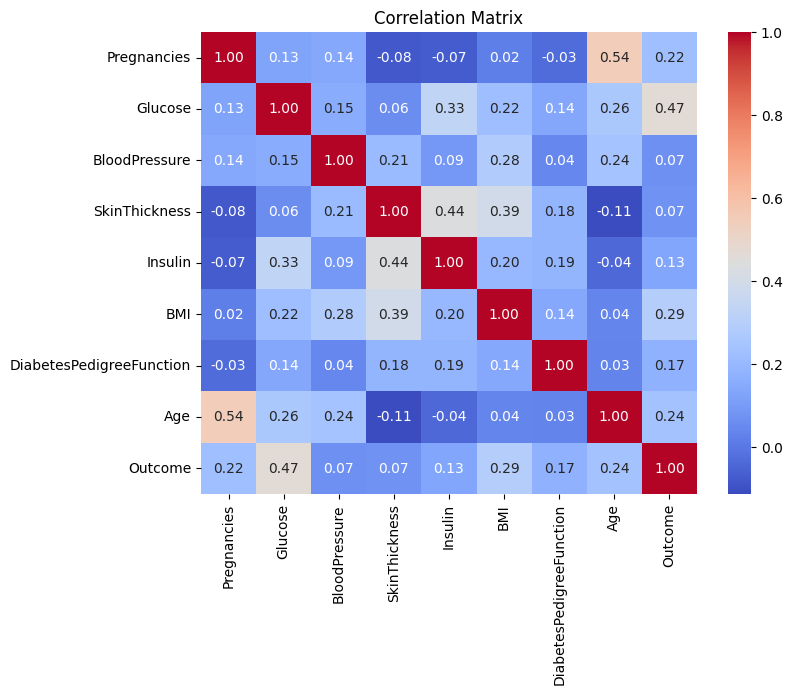

In [180]:
corr_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

High Correlation Filter

In [181]:
corr_matrix = data.corr().abs()

# Select upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than a threshold (e.g., 0.8)
threshold = 0.5
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the highly correlated features
filtered_data = data.drop(columns=to_drop)

Low Variance Filter

In [182]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.5)  # Adjust threshold as needed

# Fit the selector to your filtered data (excluding the target variable)
X_filtered = filtered_data.drop('Outcome', axis=1) # Assuming 'Outcome' is your target variable
selector.fit(X_filtered)

# Get the selected feature indices
selected_features = X_filtered.columns[selector.get_support(indices=True)]

# Create a new DataFrame with selected features
final_filtered_data = filtered_data[selected_features]

In [183]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

X = final_filtered_data
y = filtered_data['Outcome']



Forward and Backward Feature Selection

In [184]:
# Assuming X and y are defined as you provided
# X = final_filtered_data
# y = filtered_data['Outcome']

# Create and fit the model
model = LogisticRegression()

# Forward Feature Selection
sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto', scoring='accuracy')
sfs_forward.fit(X, y)
selected_features_forward = X.columns[sfs_forward.get_support()]
forward_selected_data = X[selected_features_forward]

# Backward Feature Selection
sfs_backward = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto', scoring='accuracy')
sfs_backward.fit(X, y)
selected_features_backward = X.columns[sfs_backward.get_support()]
backward_selected_data = X[selected_features_backward]

In [185]:
# --- Forward Selection ---
# Split the data
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(
    forward_selected_data, y, test_size=0.2, random_state=42
)

In [186]:
# Train and evaluate the model
model_forward = LogisticRegression()
model_forward.fit(X_train_forward, y_train_forward)
y_pred_forward = model_forward.predict(X_test_forward)
accuracy_forward = accuracy_score(y_test_forward, y_pred_forward)
print(f"Accuracy (Forward Selection): {accuracy_forward}")


Accuracy (Forward Selection): 0.7727272727272727


In [187]:
# --- Backward Selection ---
# Split the data
X_train_backward, X_test_backward, y_train_backward, y_test_backward = train_test_split(
    backward_selected_data, y, test_size=0.2, random_state=42
)

In [188]:
# Train and evaluate the model
model_backward = LogisticRegression()
model_backward.fit(X_train_backward, y_train_backward)
y_pred_backward = model_backward.predict(X_test_backward)
accuracy_backward = accuracy_score(y_test_backward, y_pred_backward)
print(f"Accuracy (Backward Selection): {accuracy_backward}")

Accuracy (Backward Selection): 0.7727272727272727


In [189]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined as you provided after your feature selection steps
# You can use either forward_selected_data or backward_selected_data
# or the original data X and y

# Split the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")


Accuracy (Random Forest): 0.7467532467532467


**From Here Melbourne Housing Dataset:**

In [190]:
df=pd.read_csv('melbourne_housing_raw.csv')

In [191]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [192]:
df.shape

(34857, 20)

In [193]:
df.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom2,8217


In [194]:
missing_ratio = df.isnull().mean() * 100
print(missing_ratio)

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64


In [195]:
threshold_missing = 25
filtered_data_missing = df.loc[:, missing_ratio <= threshold_missing]
print(filtered_data_missing)

           Suburb  Rooms Type      Price Method        SellerG     Date  \
0      Abbotsford      2    h        NaN     SS         Jellis   3/9/16   
1      Abbotsford      2    h  1480000.0      S         Biggin  3/12/16   
2      Abbotsford      2    h  1035000.0      S         Biggin   4/2/16   
3      Abbotsford      3    u        NaN     VB         Rounds   4/2/16   
4      Abbotsford      3    h  1465000.0     SP         Biggin   4/3/17   
...           ...    ...  ...        ...    ...            ...      ...   
34852  Yarraville      4    h  1480000.0     PI            Jas  24/2/18   
34853  Yarraville      2    h   888000.0     SP        Sweeney  24/2/18   
34854  Yarraville      2    t   705000.0      S            Jas  24/2/18   
34855  Yarraville      3    h  1140000.0     SP  hockingstuart  24/2/18   
34856  Yarraville      2    h  1020000.0     PI             RW  24/2/18   

       Distance  Postcode  Bedroom2  Bathroom               CouncilArea  \
0           2.5    3067.

In [196]:
X_missing = filtered_data_missing.drop('Price', axis=1)
y = filtered_data_missing['Price']

<ipython-input-197-c5b9ce71f7b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_missing[column] = label_encoder.fit_transform(filtered_data_missing[column])
<ipython-input-197-c5b9ce71f7b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_missing[column] = label_encoder.fit_transform(filtered_data_missing[column])
<ipython-input-197-c5b9ce71f7b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

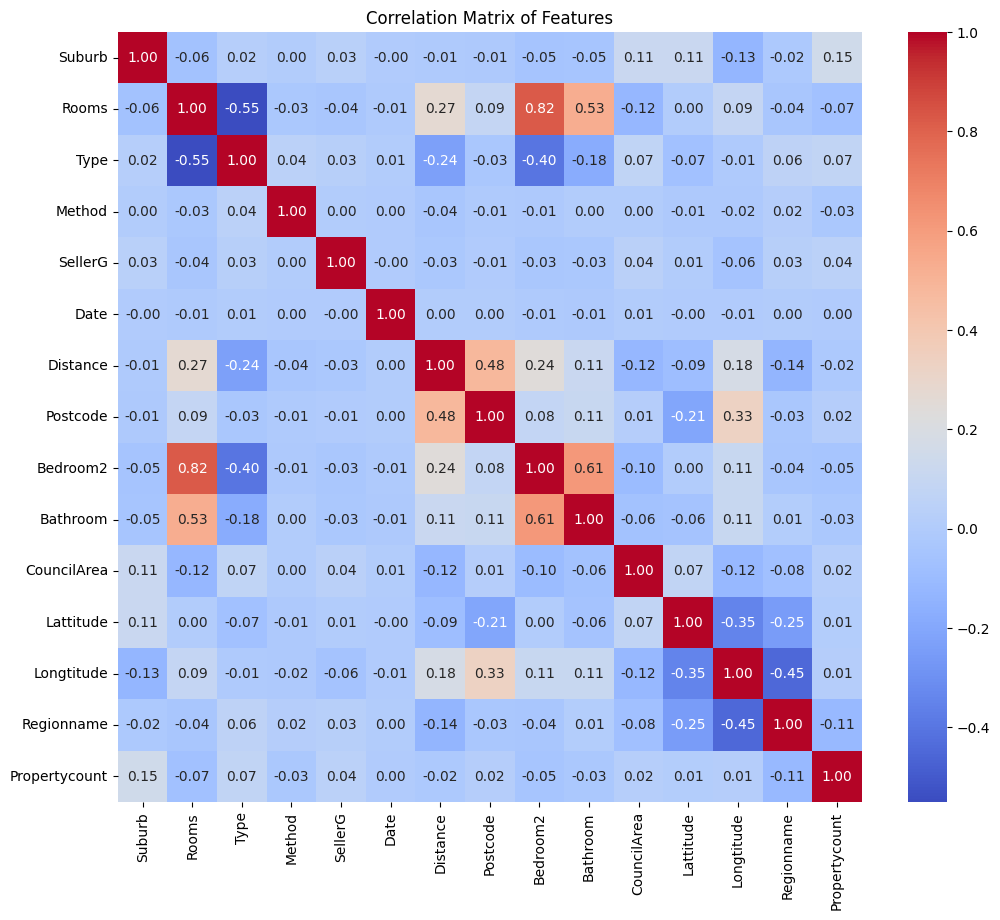

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assume 'filtered_data_missing' is the data already filtered with 25% threshold for missing values
# filtered_data_missing = df.loc[:, missing_ratio <= threshold_missing] (already done by you)

# Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
for column in filtered_data_missing.columns:
    if filtered_data_missing[column].dtype == object:  # Check if the column is of type object (string)
        filtered_data_missing[column] = label_encoder.fit_transform(filtered_data_missing[column])

# Separate features (X) and target (y)
X_missing = filtered_data_missing.drop('Price', axis=1)
y = filtered_data_missing['Price']

# Handle missing values (e.g., by imputation)
X_missing = X_missing.fillna(X_missing.mean())  # Replace NaN with the mean of the column

# Calculate the correlation matrix for the filtered data
corr_matrix = X_missing.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [198]:
threshold_corr = 0.85

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than the threshold
to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > threshold_corr)]

print(f"Features to drop due to correlation > {threshold_corr}:\n", to_drop_corr)

# Drop the highly correlated features from the training dataset
X_filtered_corr = X_train.drop(columns=to_drop_corr)

# Ensure no NaN values in the target (y_train)
y_train = y_train.fillna(y_train.mean())

# Train a model to evaluate the impact (using Linear Regression in this example)
model = LinearRegression()
model.fit(X_filtered_corr, y_train)

# Drop the highly correlated features from the test dataset
X_test_filtered_corr = X_test.drop(columns=to_drop_corr)

# Now, you can use this filtered test set to make predictions or evaluate the model's performance

Features to drop due to correlation > 0.85:
 []


Filter High Correlation

In [199]:
# High Correlation Filter
corr_matrix = filtered_data.corr().abs()

# Select upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than a threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the highly correlated features
filtered_data_corr = filtered_data.drop(columns=to_drop)

# Print the number of features after high correlation filter
print(f"Number of features after High Correlation Filter: {filtered_data_corr.shape[1]}")
print(filtered_data_corr)


Number of features after High Correlation Filter: 8
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Outcome  
0                 

Low variance Filter

In [200]:
# Initialize VarianceThreshold with the threshold of 0.5
var_thresh = VarianceThreshold(threshold=0.5)

# Apply the variance filter to the dataset (excluding the target variable 'Price')
X = filtered_data_corr.drop('Outcome', axis=1)  # Assuming 'Price' is the target column

# Fit and transform the data
X_low_variance = var_thresh.fit_transform(X)

# Get the feature names that remain after applying the variance filter
selected_features = X.columns[var_thresh.get_support()]

# Create a new DataFrame with the selected features and the target variable
filtered_data_var = pd.DataFrame(X_low_variance, columns=selected_features)
filtered_data_var['Outcome'] = filtered_data_corr['Outcome'].values  # Add back the target column

# Print the number of features after the Low Variance Filter
print(f"Number of features after Low Variance Filter: {filtered_data_var.shape[1]}")

# Display the names of the selected features
print("Selected Features:", selected_features)

# Display the data types of the selected features
print("\nData types of the selected features:")
print(filtered_data_var[selected_features].dtypes)

Number of features after Low Variance Filter: 7
Selected Features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI'],
      dtype='object')

Data types of the selected features:
Pregnancies      float64
Glucose          float64
BloodPressure    float64
SkinThickness    float64
Insulin          float64
BMI              float64
dtype: object


Forward feature selection

In [201]:
# Assuming X and y are defined as your filtered data and target variable
X = filtered_data_var.drop('Outcome', axis=1)
y = filtered_data_var['Outcome']


# --- Forward Selection ---
# Split the data
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the model (e.g., LogisticRegression)
model_forward = LogisticRegression(max_iter=1000)  # You can adjust parameters as needed

# Perform Forward Feature Selection
sfs_forward = SequentialFeatureSelector(model_forward, direction='forward', n_features_to_select='auto', scoring='accuracy')
sfs_forward.fit(X_train_forward, y_train_forward)


# Get the selected features
selected_features_forward = X.columns[sfs_forward.get_support()]

# Create a new DataFrame with the selected features
X_train_forward_selected = X_train_forward[selected_features_forward]
X_test_forward_selected = X_test_forward[selected_features_forward]

# Train the model with the selected features
model_forward.fit(X_train_forward_selected, y_train_forward)

# Make predictions and evaluate accuracy
y_pred_forward = model_forward.predict(X_test_forward_selected)
accuracy_forward = accuracy_score(y_test_forward, y_pred_forward)

print(f"Accuracy (Forward Selection): {accuracy_forward}")
print(f"Selected features (Forward Selection): {selected_features_forward}")

Accuracy (Forward Selection): 0.7727272727272727
Selected features (Forward Selection): Index(['Pregnancies', 'Glucose', 'BMI'], dtype='object')


Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are defined as your filtered data and target variable
X = filtered_data_var.drop('Outcome', axis=1)
y = filtered_data_var['Outcome']

# --- Forward Selection ---
# Split the data
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the RandomForest model
model_forward = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Forward Feature Selection
sfs_forward = SequentialFeatureSelector(model_forward, direction='forward', n_features_to_select='auto', scoring='accuracy')
sfs_forward.fit(X_train_forward, y_train_forward)

# Get the selected features
selected_features_forward = X.columns[sfs_forward.get_support()]

# Create a new DataFrame with the selected features
X_train_forward_selected = X_train_forward[selected_features_forward]
X_test_forward_selected = X_test_forward[selected_features_forward]

# Train the model with the selected features
model_forward.fit(X_train_forward_selected, y_train_forward)

# Make predictions and evaluate accuracy
y_pred_forward = model_forward.predict(X_test_forward_selected)
accuracy_forward = accuracy_score(y_test_forward, y_pred_forward)

print(f"Accuracy (Forward Selection with Random Forest): {accuracy_forward}")
print(f"Selected features (Forward Selection with Random Forest): {selected_features_forward}")


Accuracy (Forward Selection with Random Forest): 0.6883116883116883
Selected features (Forward Selection with Random Forest): Index(['Glucose', 'Insulin', 'BMI'], dtype='object')
